In [1]:
import pandas as pd
original = pd.read_csv("/content/drive/MyDrive/AquaMan/fish_daily_report.csv", encoding='cp949')

In [2]:
original

,No,양식장,날짜,라벨,라벨2(어장_수조_샘플번호_날짜_길이_무게_사이즈),체장(mm),체중(g),수조번호,사육미수,일일폐사량,사료정보,일일 사료 급이량(KG),투약일자,약품명,투여량(ML 또는 L),투여단위,투여방법,기타사항,검출 병원체
0,88,OS,220704,OS070401,F01_U01_O0088_D2022-07-04_L420_W0749_S3,420,749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
1,89,OS,220704,OS070402,F01_U01_O0089_D2022-07-04_L335_W0379_S2,335,379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
2,90,OS,220704,OS070403,F01_U01_O0090_D2022-07-04_L325_W0295_S2,325,295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
3,91,OS,220704,OS070404,F01_U01_O0091_D2022-07-04_L345_W0407_S2,345,407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
4,92,OS,220704,OS070405,F01_U01_O0092_D2022-07-04_L370_W0573_S3,370,573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3797,3798,GM,221111,GM111101,F20_U01_O3798_D2022-11-25_L220_W0083_S1,220,83,10동3,8000.0,NaN,배합사료(EP),80.0,NaN,NaN,NaN,NaN,NaN,NaN,0
3798,3799,GM,221111,GM111102,F20_U01_O3799_D2022-11-25_L220_W0078_S1,220,78,10동3,8000.0,NaN,배합사료(EP),80.0,NaN,NaN,NaN,NaN,NaN,NaN,0
3799,3800,GM,221111,GM111103,F20_U01_O3800_D2022-11-25_L200_W0061_S1,200,61,10동3,8000.0,NaN,배합사료(EP),80.0,NaN,NaN,NaN,NaN,NaN,NaN,0
3800,3801,GM,221111,GM111104,F20_U01_O3801_D2022-11-25_L240_W0108_S1,240,108,10동4,6000.0,NaN,배합사료(EP),80.0,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
original.drop(columns=['No','라벨','라벨2(어장_수조_샘플번호_날짜_길이_무게_사이즈)','일일폐사량','투약일자', '약품명', '투여량(ML 또는 L)', '투여단위', '투여방법', '기타사항', '검출 병원체', '수조번호'], inplace = True)

In [4]:
original.dropna(inplace=True)
original['개별 사료 급이량(g)'] = (original['일일 사료 급이량(KG)'].values / original['사육미수'].values) * 1000
original.drop(columns=['사육미수','일일 사료 급이량(KG)'], inplace=True)
original

,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
15,IC,220704,345,500,생사료(MP),29.090909
16,IC,220704,380,673,생사료(MP),29.090909
17,IC,220704,355,410,생사료(MP),29.090909
18,IC,220704,330,312,생사료(MP),29.090909
19,IC,220704,345,514,생사료(MP),29.090909
...,...,...,...,...,...,...
3797,GM,221111,220,83,배합사료(EP),10.000000
3798,GM,221111,220,78,배합사료(EP),10.000000
3799,GM,221111,200,61,배합사료(EP),10.000000
3800,GM,221111,240,108,배합사료(EP),13.333333


In [5]:
grouped = original.groupby('양식장')

In [6]:

from IPython.display import display

for name, group in grouped:
    print(f"Group: {name}, 총 개체수 {len(group)}")
    display(group)
# HM(1143), IC(1506), OS(631, NAN 데이터 살짝) TP(447)

Group: DK, 총 개체수 1


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
2677,DK,220930,305,252,생사료(MP),33.333333


Group: DS, 총 개체수 1


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
2676,DS,220930,300,265,생사료(MP),33.333333


Group: GM, 총 개체수 15


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
3357,GM,221027,155,40,배합사료(EP),10.000000
3358,GM,221027,120,16,배합사료(EP),10.000000
3359,GM,221027,130,20,배합사료(EP),10.000000
3360,GM,221027,165,43,배합사료(EP),10.000000
3361,GM,221027,130,15,배합사료(EP),10.000000
3362,GM,221027,135,21,배합사료(EP),10.000000
3363,GM,221027,125,14,배합사료(EP),10.000000
3364,GM,221027,130,16,배합사료(EP),10.000000
3365,GM,221027,120,13,배합사료(EP),10.000000
3366,GM,221027,130,21,배합사료(EP),10.000000


Group: HB, 총 개체수 2


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
3120,HB,221018,444,718,생사료(MP),45.454545
3121,HB,221018,400,641,생사료(MP),45.454545


Group: HD, 총 개체수 10


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
797,HD,220803,310,293,생사료(MP),22.857143
798,HD,220803,310,378,생사료(MP),22.857143
799,HD,220803,265,189,생사료(MP),22.857143
1019,HD,220810,290,241,생사료(MP),22.857143
1020,HD,220810,290,206,생사료(MP),22.857143
1021,HD,220810,305,258,생사료(MP),22.857143
2078,HD,220914,205,74,생사료(MP),10.000000
2079,HD,220914,200,62,생사료(MP),10.000000
2080,HD,220914,330,324,생사료(MP),22.857143
2081,HD,220914,320,363,생사료(MP),22.857143


Group: HJ, 총 개체수 2


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
3010,HJ,221014,370,323,생사료(MP),31.25
3011,HJ,221014,390,488,생사료(MP),31.25


Group: HM, 총 개체수 941


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
58,HM,220705,265,216,생사료(MP),21.917808
59,HM,220705,230,149,생사료(MP),21.917808
60,HM,220705,240,173,생사료(MP),21.917808
61,HM,220705,245,172,생사료(MP),21.917808
62,HM,220705,235,176,생사료(MP),21.917808
...,...,...,...,...,...,...
3634,HM,221107,330,319,생사료(MP),28.571429
3635,HM,221107,360,463,생사료(MP),28.571429
3636,HM,221107,320,306,생사료(MP),28.571429
3637,HM,221107,325,337,생사료(MP),28.571429


Group: HY, 총 개체수 2


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
740,HY,220801,290,181,배합사료(EP),31.25
741,HY,220801,340,408,배합사료(EP),31.25


Group: IC, 총 개체수 1389


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
15,IC,220704,345,500,생사료(MP),29.090909
16,IC,220704,380,673,생사료(MP),29.090909
17,IC,220704,355,410,생사료(MP),29.090909
18,IC,220704,330,312,생사료(MP),29.090909
19,IC,220704,345,514,생사료(MP),29.090909
...,...,...,...,...,...,...
3792,IC,221111,165,43,배합사료(EP),6.779661
3793,IC,221111,175,54,배합사료(EP),6.779661
3794,IC,221111,160,40,배합사료(EP),6.779661
3795,IC,221111,155,32,배합사료(EP),6.779661


Group: IS, 총 개체수 1


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
3168,IS,221019,330,310,생사료(MP),26.666667


Group: JH, 총 개체수 20


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
983,JH,220809,360,499,생사료(MP),28.571429
984,JH,220809,335,388,생사료(MP),28.571429
985,JH,220809,360,430,생사료(MP),28.571429
986,JH,220809,420,715,생사료(MP),28.571429
1128,JH,220816,360,527,생사료(MP),26.666667
1129,JH,220816,395,484,생사료(MP),26.666667
1130,JH,220816,370,603,생사료(MP),26.666667
1131,JH,220816,430,883,생사료(MP),26.666667
1132,JH,220816,420,705,생사료(MP),26.666667
1133,JH,220816,410,798,생사료(MP),26.666667


Group: KL, 총 개체수 1


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
3169,KL,221019,385,386,생사료(MP),26.666667


Group: OS, 총 개체수 449


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
243,OS,220712,300,290,생사료(MP),28.571429
244,OS,220712,310,243,생사료(MP),28.571429
245,OS,220712,405,697,생사료(MP),28.571429
246,OS,220712,345,452,생사료(MP),28.571429
247,OS,220712,305,271,생사료(MP),28.571429
...,...,...,...,...,...,...
3644,OS,221107,375,563,생사료(MP),25.714286
3645,OS,221107,400,627,생사료(MP),28.571429
3646,OS,221107,365,456,생사료(MP),28.571429
3647,OS,221107,360,333,생사료(MP),28.571429


Group: SD, 총 개체수 2


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
3020,SD,221014,480,989,생사료(MP),50.0
3021,SD,221014,450,1046,생사료(MP),50.0


Group: SW, 총 개체수 2


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
3108,SW,221018,335,294,생사료(MP),40.0
3109,SW,221018,355,301,생사료(MP),40.0


Group: TP, 총 개체수 429


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
73,TP,220706,365,543,생사료(MP),22.857143
74,TP,220706,405,735,생사료(MP),22.857143
75,TP,220706,360,418,생사료(MP),22.857143
76,TP,220706,345,409,생사료(MP),22.857143
77,TP,220706,370,522,생사료(MP),22.857143
...,...,...,...,...,...,...
3451,TP,221028,327,365,생사료(MP),28.571429
3452,TP,221028,350,381,생사료(MP),28.571429
3453,TP,221028,355,369,생사료(MP),31.250000
3454,TP,221028,352,346,생사료(MP),31.250000


Group: YJ, 총 개체수 2


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
3090,YJ,221018,315,314,생사료(MP),35.555556
3091,YJ,221018,290,260,생사료(MP),35.555556


Group: YR, 총 개체수 1


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
2675,YR,220930,310,277,생사료(MP),30.0


# OS 양식장

In [14]:
os_group = grouped.get_group("OS")
os_group = os_group.dropna(subset=['개별 사료 급이량(g)'])
print(os_group['날짜'].unique())

[220712 220718 220719 220720 220725 220726 220801 220802 220803 220808
 220809 220816 220907 220913 220919 220926 220927 220928 221004 221005
 221012 221018 221024 221025 221026 221031 221101 221102 221107]


In [15]:
start_date = pd.to_datetime('2022-07-12')
os_group['날짜'] = pd.to_datetime(os_group['날짜'], format='%y%m%d')
os_group['지난 일수'] = (os_group['날짜'] - start_date).dt.days
os_group.drop(columns='날짜', inplace=True)
day_list = os_group['지난 일수'].unique()

In [16]:
df = os_group.groupby('지난 일수')['체장(mm)', '체중(g)','개별 사료 급이량(g)'].median()
df['사료정보'] = os_group.groupby('지난 일수')['사료정보'].unique()
temp = len(df)
for _ in range(temp) :
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
  df = df.iloc[0:1].append(df[df['체중(g)'].diff() >= 0])

display(df)

<ipython-input-16-424d3333526e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = os_group.groupby('지난 일수')['체장(mm)', '체중(g)','개별 사료 급이량(g)'].median()
<ipython-input-16-424d3333526e>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-16-424d3333526e>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체중(g)'].diff() >= 0])
<ipython-input-16-424d3333526e>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-16-424d3333526e>:6: FutureWarning: The frame.append method is deprecated an

,체장(mm),체중(g),개별 사료 급이량(g),사료정보
지난 일수,,,,
0,315.0,332.0,28.571429,[생사료(MP)]
6,345.0,369.0,28.571429,[생사료(MP)]
13,350.0,407.0,28.571429,[생사료(MP)]
21,370.0,481.5,28.571429,[생사료(MP)]
27,380.0,563.0,34.285714,[생사료(MP)]


In [17]:
last_day = df.index.max()
new_index = pd.Index(range(last_day + 1), name='지난 일수')

# 지난 일수를 인덱스로 설정하고 새로운 인덱스와 합쳐서 결측치 보간
df = df.reindex(new_index).interpolate(method='linear')
df['사료정보'] = df['사료정보'].fillna(method='ffill')
df

,체장(mm),체중(g),개별 사료 급이량(g),사료정보
지난 일수,,,,
0,315.000000,332.000000,28.571429,[생사료(MP)]
1,320.000000,338.166667,28.571429,[생사료(MP)]
2,325.000000,344.333333,28.571429,[생사료(MP)]
3,330.000000,350.500000,28.571429,[생사료(MP)]
4,335.000000,356.666667,28.571429,[생사료(MP)]
5,340.000000,362.833333,28.571429,[생사료(MP)]
6,345.000000,369.000000,28.571429,[생사료(MP)]
7,345.714286,374.428571,28.571429,[생사료(MP)]
8,346.428571,379.857143,28.571429,[생사료(MP)]


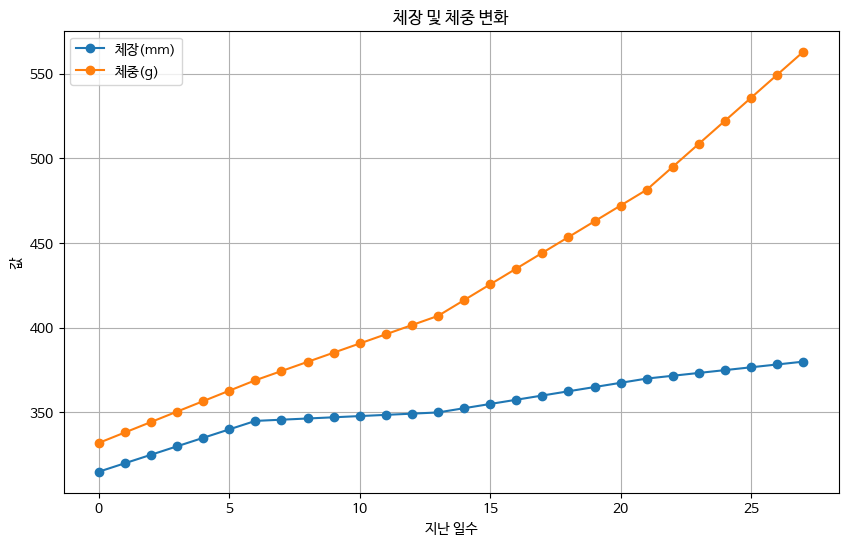

In [18]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.plot(df.index, df['체장(mm)'], marker='o', label='체장(mm)')  # 체장 데이터 plot
plt.plot(df.index, df['체중(g)'], marker='o', label='체중(g)')  # 체중 데이터 plot
plt.xlabel('지난 일수')  # x축 레이블
plt.ylabel('값')  # y축 레이블
plt.title('체장 및 체중 변화')  # 그래프 제목
plt.legend()  # 범례 추가
plt.grid(True)  # 그리드 추가
plt.show()  # 그래프 출력

# 사료 정보가 있는 양식장에 대해서 LSTM train

In [21]:
for item in ['OS','IC','HM','TP','GM', 'JH'] :
  group = grouped.get_group(item)
  group = group.dropna(subset=['개별 사료 급이량(g)'])


  group['날짜'] = pd.to_datetime(group['날짜'], format='%y%m%d')
  group['지난 일수'] = (group['날짜'] - group['날짜'].iloc[0]).dt.days
  group.drop(columns='날짜', inplace=True)
  day_list = group['지난 일수'].unique()

  df = group.groupby('지난 일수')['체장(mm)', '체중(g)','개별 사료 급이량(g)'].median()
  temp = len(df)
  for _ in range(temp) :
    df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
    df = df.iloc[0:1].append(df[df['체중(g)'].diff() >= 0])

  last_day = df.index.max()
  new_index = pd.Index(range(last_day + 1), name='지난 일수')

  # 지난 일수를 인덱스로 설정하고 새로운 인덱스와 합쳐서 결측치 보간
  df = df.reindex(new_index).interpolate(method='linear')
  df['7일 후 체장(mm)'] = df['체장(mm)'].shift(-7)
  df['7일 후 체중(g)'] = df['체중(g)'].shift(-7)

  # 뒤의 7개 행 삭제
  df = df[:-7]
  df.to_csv("/content/" + item + "_data.csv", index=False)

  display(df)

<ipython-input-21-a59139b045a2>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = group.groupby('지난 일수')['체장(mm)', '체중(g)','개별 사료 급이량(g)'].median()
<ipython-input-21-a59139b045a2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-21-a59139b045a2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체중(g)'].diff() >= 0])
<ipython-input-21-a59139b045a2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-21-a59139b045a2>:15: FutureWarning: The frame.append method is deprecated 

,체장(mm),체중(g),개별 사료 급이량(g),7일 후 체장(mm),7일 후 체중(g)
지난 일수,,,,,
0,315.000000,332.000000,28.571429,345.714286,374.428571
1,320.000000,338.166667,28.571429,346.428571,379.857143
2,325.000000,344.333333,28.571429,347.142857,385.285714
3,330.000000,350.500000,28.571429,347.857143,390.714286
4,335.000000,356.666667,28.571429,348.571429,396.142857
5,340.000000,362.833333,28.571429,349.285714,401.571429
6,345.000000,369.000000,28.571429,350.000000,407.000000
7,345.714286,374.428571,28.571429,352.500000,416.312500
8,346.428571,379.857143,28.571429,355.000000,425.625000


<ipython-input-21-a59139b045a2>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = group.groupby('지난 일수')['체장(mm)', '체중(g)','개별 사료 급이량(g)'].median()
<ipython-input-21-a59139b045a2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-21-a59139b045a2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체중(g)'].diff() >= 0])
<ipython-input-21-a59139b045a2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-21-a59139b045a2>:15: FutureWarning: The frame.append method is deprecated 

,체장(mm),체중(g),개별 사료 급이량(g),7일 후 체장(mm),7일 후 체중(g)
지난 일수,,,,,
0,345.000000,480.000000,29.090909,359.000000,541.600000
1,347.000000,488.800000,28.888757,361.000000,550.400000
2,349.000000,497.600000,28.686605,363.000000,559.200000
3,351.000000,506.400000,28.484454,365.000000,568.000000
4,353.000000,515.200000,28.282302,367.000000,576.800000
...,...,...,...,...,...
91,441.849315,796.863014,33.463903,445.445205,812.541096
92,442.363014,799.102740,33.630286,445.958904,814.780822
93,442.876712,801.342466,33.796669,446.472603,817.020548


<ipython-input-21-a59139b045a2>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = group.groupby('지난 일수')['체장(mm)', '체중(g)','개별 사료 급이량(g)'].median()
<ipython-input-21-a59139b045a2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-21-a59139b045a2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체중(g)'].diff() >= 0])
<ipython-input-21-a59139b045a2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-21-a59139b045a2>:15: FutureWarning: The frame.append method is deprecated 

,체장(mm),체중(g),개별 사료 급이량(g),7일 후 체장(mm),7일 후 체중(g)
지난 일수,,,,,
0,235.000000,136.00,21.917808,260.0,173.000000
1,235.000000,136.00,14.598540,260.0,175.571429
2,240.000000,149.00,14.507772,260.0,178.142857
3,241.250000,150.75,14.640228,260.0,180.714286
4,242.500000,152.50,14.772683,260.0,183.285714
...,...,...,...,...,...
87,318.333333,337.00,24.221267,323.5,352.600000
88,318.750000,338.00,24.288400,324.5,360.700000
89,319.166667,339.00,24.355532,325.5,368.800000


<ipython-input-21-a59139b045a2>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = group.groupby('지난 일수')['체장(mm)', '체중(g)','개별 사료 급이량(g)'].median()
<ipython-input-21-a59139b045a2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-21-a59139b045a2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체중(g)'].diff() >= 0])
<ipython-input-21-a59139b045a2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-21-a59139b045a2>:15: FutureWarning: The frame.append method is deprecated 

,체장(mm),체중(g),개별 사료 급이량(g),7일 후 체장(mm),7일 후 체중(g)
지난 일수,,,,,
0,345.000000,412.000000,22.857143,346.666667,414.666667
1,345.238095,412.380952,22.857143,346.904762,415.047619
2,345.476190,412.761905,22.857143,347.142857,415.428571
3,345.714286,413.142857,22.857143,347.380952,415.809524
4,345.952381,413.523810,22.857143,347.619048,416.190476
...,...,...,...,...,...
89,401.250000,596.500000,30.625000,405.227273,616.545455
90,401.818182,599.363636,30.681818,405.795455,619.409091
91,402.386364,602.227273,30.738636,406.363636,622.272727


<ipython-input-21-a59139b045a2>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = group.groupby('지난 일수')['체장(mm)', '체중(g)','개별 사료 급이량(g)'].median()
<ipython-input-21-a59139b045a2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-21-a59139b045a2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체중(g)'].diff() >= 0])
<ipython-input-21-a59139b045a2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-21-a59139b045a2>:15: FutureWarning: The frame.append method is deprecated 

,체장(mm),체중(g),개별 사료 급이량(g),7일 후 체장(mm),7일 후 체중(g)
지난 일수,,,,,
0,130.0,18.000000,10.0,172.0,48.333333
1,136.0,22.333333,10.0,178.0,52.666667
2,142.0,26.666667,10.0,184.0,57.000000
3,148.0,31.000000,10.0,190.0,61.333333
4,154.0,35.333333,10.0,196.0,65.666667
5,160.0,39.666667,10.0,202.0,70.000000
6,166.0,44.000000,10.0,208.0,74.333333
7,172.0,48.333333,10.0,214.0,78.666667
8,178.0,52.666667,10.0,220.0,83.000000


<ipython-input-21-a59139b045a2>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = group.groupby('지난 일수')['체장(mm)', '체중(g)','개별 사료 급이량(g)'].median()
<ipython-input-21-a59139b045a2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-21-a59139b045a2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체중(g)'].diff() >= 0])
<ipython-input-21-a59139b045a2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-21-a59139b045a2>:15: FutureWarning: The frame.append method is deprecated 

,체장(mm),체중(g),개별 사료 급이량(g),7일 후 체장(mm),7일 후 체중(g)
지난 일수,,,,,
0,360.0,464.5,28.571429,385.0,617.5


In [22]:
# sample prediction
for item in ['HD'] :
  group = grouped.get_group(item)
  group = group.dropna(subset=['개별 사료 급이량(g)'])

  df = group[['체장(mm)','체중(g)','개별 사료 급이량(g)']]
  df.to_csv("/content/" + item + "_data.csv", index=False)


In [23]:
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 데이터 로드
data1 = pd.read_csv("/content/OS_data.csv")
data2 = pd.read_csv("/content/IC_data.csv")
data3 = pd.read_csv("/content/HM_data.csv")
data4 = pd.read_csv("/content/TP_data.csv")
data5 = pd.read_csv("/content/GM_data.csv")

df_list = [data2, data3, data4, data5]
df_test = data1
train_data = pd.concat(df_list)
train_data = train_data.sample(frac=1).reset_index()

test_data = df_test

# 입력 및 출력 데이터 선택
X_train = train_data[['체장(mm)', '체중(g)', '개별 사료 급이량(g)']].values
y_train_1 = train_data['7일 후 체장(mm)'].values
y_train_2 = train_data['7일 후 체중(g)'].values

X_test = test_data[['체장(mm)', '체중(g)', '개별 사료 급이량(g)']].values

# 데이터 스케일링
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(3, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# LSTM 모델 학습
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
model.fit(X_train_scaled, y_train_1, epochs=100, batch_size=32, verbose=0)

In [24]:
# 예측
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
prediction1 = model.predict(X_test_scaled)

1/1 [==============================] - 0s 170ms/step


In [25]:
# 결과 저장
result = pd.DataFrame(test_data)
result['7일 후 체장(mm) 예측'] = prediction1

# 체중 예측을 위한 LSTM 모델 학습 및 예측
model.fit(X_train_scaled, y_train_2, epochs=100, batch_size=32, verbose=0)
prediction2 = model.predict(X_test_scaled)
result['7일 후 체중(g) 예측'] = prediction2

# 결과 출력
display(result)

1/1 [==============================] - 0s 27ms/step


,체장(mm),체중(g),개별 사료 급이량(g),7일 후 체장(mm),7일 후 체중(g),7일 후 체장(mm) 예측,7일 후 체중(g) 예측
0,315.000000,332.000000,28.571429,345.714286,374.428571,318.640991,351.234863
1,320.000000,338.166667,28.571429,346.428571,379.857143,323.152985,363.558441
2,325.000000,344.333333,28.571429,347.142857,385.285714,327.682007,376.121368
3,330.000000,350.500000,28.571429,347.857143,390.714286,332.227631,388.923462
4,335.000000,356.666667,28.571429,348.571429,396.142857,336.789490,401.963959
5,340.000000,362.833333,28.571429,349.285714,401.571429,341.367157,415.241974
6,345.000000,369.000000,28.571429,350.000000,407.000000,345.960205,428.756256
7,345.714286,374.428571,28.571429,352.500000,416.312500,346.881042,431.731384
8,346.428571,379.857143,28.571429,355.000000,425.625000,347.802155,434.714996
9,347.142857,385.285714,28.571429,357.500000,434.937500,348.723572,437.707062


In [26]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.9 MB/s eta 0:00:00


# 하이퍼 파라미터 튜닝 (체장예측)

In [29]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import optuna


def objective(trial):
    # 하이퍼파라미터 설정
    params = {
        'lstm_units': trial.suggest_int('lstm_units', 20, 200),
        'dense_units': trial.suggest_int('dense_units', 10, 100),
        'batch_size': trial.suggest_int('batch_size', 16, 64),
        'epochs': trial.suggest_int('epochs', 10, 100)
    }

    # LSTM 모델 구성
    model = Sequential()
    model.add(LSTM(params['lstm_units'], activation='relu', input_shape=(3, 1)))
    model.add(Dense(params['dense_units'], activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # 데이터 스케일링 및 변환
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train).reshape((-1, 3, 1))
    X_test_scaled = scaler.transform(X_test).reshape((-1, 3, 1))

    # 모델 학습
    model.fit(X_train_scaled, y_train_1, epochs=params['epochs'], batch_size=params['batch_size'], verbose=0)

    # 예측 및 평가
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(test_data['7일 후 체장(mm)'], y_pred)

    return mse

# 하이퍼파라미터 최적화
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print('Best hyperparameters:', study.best_params)
print('Best MSE:', study.best_value)


[I 2023-11-27 05:10:09,358] A new study created in memory with name: no-name-c10dac30-e166-4edc-811f-934bd693fa24


1/1 [==============================] - 0s 149ms/step


[I 2023-11-27 05:10:12,382] Trial 0 finished with value: 116395.66546037259 and parameters: {'lstm_units': 74, 'dense_units': 34, 'batch_size': 58, 'epochs': 14}. Best is trial 0 with value: 116395.66546037259.


1/1 [==============================] - 0s 212ms/step


[I 2023-11-27 05:10:20,111] Trial 1 finished with value: 194.76649393502692 and parameters: {'lstm_units': 108, 'dense_units': 76, 'batch_size': 61, 'epochs': 88}. Best is trial 1 with value: 194.76649393502692.


1/1 [==============================] - 0s 148ms/step


[I 2023-11-27 05:10:26,837] Trial 2 finished with value: 231.07560482557923 and parameters: {'lstm_units': 29, 'dense_units': 77, 'batch_size': 55, 'epochs': 98}. Best is trial 1 with value: 194.76649393502692.


1/1 [==============================] - 0s 152ms/step


[I 2023-11-27 05:10:30,915] Trial 3 finished with value: 302.60173529253564 and parameters: {'lstm_units': 169, 'dense_units': 63, 'batch_size': 52, 'epochs': 44}. Best is trial 1 with value: 194.76649393502692.


1/1 [==============================] - 0s 147ms/step


[I 2023-11-27 05:10:44,521] Trial 4 finished with value: 167.90381509139416 and parameters: {'lstm_units': 50, 'dense_units': 34, 'batch_size': 18, 'epochs': 77}. Best is trial 4 with value: 167.90381509139416.


1/1 [==============================] - 0s 153ms/step


[I 2023-11-27 05:10:53,415] Trial 5 finished with value: 203.49733500026014 and parameters: {'lstm_units': 89, 'dense_units': 79, 'batch_size': 38, 'epochs': 68}. Best is trial 4 with value: 167.90381509139416.


1/1 [==============================] - 0s 152ms/step


[I 2023-11-27 05:10:57,646] Trial 6 finished with value: 297.54129791328063 and parameters: {'lstm_units': 177, 'dense_units': 22, 'batch_size': 22, 'epochs': 20}. Best is trial 4 with value: 167.90381509139416.


1/1 [==============================] - 0s 221ms/step


[I 2023-11-27 05:11:05,796] Trial 7 finished with value: 241.8170126579529 and parameters: {'lstm_units': 50, 'dense_units': 52, 'batch_size': 34, 'epochs': 69}. Best is trial 4 with value: 167.90381509139416.


1/1 [==============================] - 0s 140ms/step


[I 2023-11-27 05:11:14,080] Trial 8 finished with value: 169.2972395840656 and parameters: {'lstm_units': 154, 'dense_units': 56, 'batch_size': 28, 'epochs': 61}. Best is trial 4 with value: 167.90381509139416.


1/1 [==============================] - 0s 223ms/step


[I 2023-11-27 05:11:20,646] Trial 9 finished with value: 164.30515136926937 and parameters: {'lstm_units': 200, 'dense_units': 21, 'batch_size': 27, 'epochs': 49}. Best is trial 9 with value: 164.30515136926937.


1/1 [==============================] - 0s 150ms/step


[I 2023-11-27 05:11:26,857] Trial 10 finished with value: 219.8858097682308 and parameters: {'lstm_units': 199, 'dense_units': 100, 'batch_size': 43, 'epochs': 40}. Best is trial 9 with value: 164.30515136926937.


1/1 [==============================] - 0s 206ms/step


[I 2023-11-27 05:11:40,460] Trial 11 finished with value: 190.19722576484233 and parameters: {'lstm_units': 127, 'dense_units': 11, 'batch_size': 19, 'epochs': 84}. Best is trial 9 with value: 164.30515136926937.


1/1 [==============================] - 0s 151ms/step


[I 2023-11-27 05:11:49,250] Trial 12 finished with value: 156.61305287824877 and parameters: {'lstm_units': 135, 'dense_units': 35, 'batch_size': 16, 'epochs': 47}. Best is trial 12 with value: 156.61305287824877.


1/1 [==============================] - 0s 141ms/step


[I 2023-11-27 05:11:58,078] Trial 13 finished with value: 201.62350858144478 and parameters: {'lstm_units': 137, 'dense_units': 36, 'batch_size': 27, 'epochs': 46}. Best is trial 12 with value: 156.61305287824877.


1/1 [==============================] - 0s 140ms/step


[I 2023-11-27 05:12:02,510] Trial 14 finished with value: 312.4154392275673 and parameters: {'lstm_units': 200, 'dense_units': 13, 'batch_size': 27, 'epochs': 31}. Best is trial 12 with value: 156.61305287824877.


1/1 [==============================] - 0s 210ms/step


[I 2023-11-27 05:12:09,677] Trial 15 finished with value: 234.6772814283109 and parameters: {'lstm_units': 148, 'dense_units': 26, 'batch_size': 33, 'epochs': 55}. Best is trial 12 with value: 156.61305287824877.


1/1 [==============================] - 0s 141ms/step


[I 2023-11-27 05:12:14,840] Trial 16 finished with value: 410.14867904317987 and parameters: {'lstm_units': 112, 'dense_units': 45, 'batch_size': 44, 'epochs': 27}. Best is trial 12 with value: 156.61305287824877.


1/1 [==============================] - 0s 148ms/step


[I 2023-11-27 05:12:21,938] Trial 17 finished with value: 193.86006193521334 and parameters: {'lstm_units': 175, 'dense_units': 23, 'batch_size': 23, 'epochs': 50}. Best is trial 12 with value: 156.61305287824877.


1/1 [==============================] - 0s 141ms/step


[I 2023-11-27 05:12:31,703] Trial 18 finished with value: 226.77021206983045 and parameters: {'lstm_units': 96, 'dense_units': 43, 'batch_size': 16, 'epochs': 34}. Best is trial 12 with value: 156.61305287824877.


1/1 [==============================] - 0s 149ms/step


[I 2023-11-27 05:12:38,200] Trial 19 finished with value: 234.6254780835749 and parameters: {'lstm_units': 159, 'dense_units': 19, 'batch_size': 32, 'epochs': 60}. Best is trial 12 with value: 156.61305287824877.


1/1 [==============================] - 0s 139ms/step


[I 2023-11-27 05:12:46,602] Trial 20 finished with value: 237.1636836538142 and parameters: {'lstm_units': 127, 'dense_units': 31, 'batch_size': 23, 'epochs': 37}. Best is trial 12 with value: 156.61305287824877.


1/1 [==============================] - 0s 225ms/step


[I 2023-11-27 05:13:01,402] Trial 21 finished with value: 189.52313127644368 and parameters: {'lstm_units': 60, 'dense_units': 41, 'batch_size': 16, 'epochs': 76}. Best is trial 12 with value: 156.61305287824877.


1/1 [==============================] - 0s 146ms/step


[I 2023-11-27 05:13:09,443] Trial 22 finished with value: 283.5506751882914 and parameters: {'lstm_units': 22, 'dense_units': 28, 'batch_size': 20, 'epochs': 53}. Best is trial 12 with value: 156.61305287824877.


1/1 [==============================] - 0s 136ms/step


[I 2023-11-27 05:13:23,899] Trial 23 finished with value: 224.56267560628706 and parameters: {'lstm_units': 46, 'dense_units': 49, 'batch_size': 16, 'epochs': 69}. Best is trial 12 with value: 156.61305287824877.


1/1 [==============================] - 0s 153ms/step


[I 2023-11-27 05:13:36,500] Trial 24 finished with value: 216.55827925545873 and parameters: {'lstm_units': 184, 'dense_units': 17, 'batch_size': 26, 'epochs': 80}. Best is trial 12 with value: 156.61305287824877.


1/1 [==============================] - 0s 216ms/step


[I 2023-11-27 05:13:45,907] Trial 25 finished with value: 165.11362086357568 and parameters: {'lstm_units': 76, 'dense_units': 60, 'batch_size': 20, 'epochs': 59}. Best is trial 12 with value: 156.61305287824877.


1/1 [==============================] - 0s 144ms/step


[I 2023-11-27 05:13:55,724] Trial 26 finished with value: 194.08477180090327 and parameters: {'lstm_units': 82, 'dense_units': 64, 'batch_size': 23, 'epochs': 61}. Best is trial 12 with value: 156.61305287824877.


1/1 [==============================] - 0s 204ms/step


[I 2023-11-27 05:14:00,528] Trial 27 finished with value: 203.56873486890137 and parameters: {'lstm_units': 108, 'dense_units': 63, 'batch_size': 37, 'epochs': 47}. Best is trial 12 with value: 156.61305287824877.


1/1 [==============================] - 0s 146ms/step


[I 2023-11-27 05:14:06,862] Trial 28 finished with value: 376.6363832977316 and parameters: {'lstm_units': 69, 'dense_units': 88, 'batch_size': 31, 'epochs': 25}. Best is trial 12 with value: 156.61305287824877.


1/1 [==============================] - 0s 141ms/step


[I 2023-11-27 05:14:11,048] Trial 29 finished with value: 360.0086560940206 and parameters: {'lstm_units': 73, 'dense_units': 58, 'batch_size': 47, 'epochs': 40}. Best is trial 12 with value: 156.61305287824877.


1/1 [==============================] - 0s 155ms/step


[I 2023-11-27 05:14:14,521] Trial 30 finished with value: 707.55421469004 and parameters: {'lstm_units': 99, 'dense_units': 40, 'batch_size': 29, 'epochs': 15}. Best is trial 12 with value: 156.61305287824877.


1/1 [==============================] - 0s 162ms/step


[I 2023-11-27 05:14:30,344] Trial 31 finished with value: 165.5084049939556 and parameters: {'lstm_units': 41, 'dense_units': 33, 'batch_size': 19, 'epochs': 93}. Best is trial 12 with value: 156.61305287824877.


1/1 [==============================] - 0s 144ms/step


[I 2023-11-27 05:14:46,136] Trial 32 finished with value: 135.59255795458165 and parameters: {'lstm_units': 38, 'dense_units': 69, 'batch_size': 19, 'epochs': 97}. Best is trial 32 with value: 135.59255795458165.


1/1 [==============================] - 0s 144ms/step


[I 2023-11-27 05:14:59,507] Trial 33 finished with value: 181.95749962871633 and parameters: {'lstm_units': 67, 'dense_units': 69, 'batch_size': 25, 'epochs': 96}. Best is trial 32 with value: 135.59255795458165.


1/1 [==============================] - 0s 138ms/step


[I 2023-11-27 05:15:13,875] Trial 34 finished with value: 145.2161601198161 and parameters: {'lstm_units': 33, 'dense_units': 87, 'batch_size': 21, 'epochs': 90}. Best is trial 32 with value: 135.59255795458165.


1/1 [==============================] - 0s 151ms/step


[I 2023-11-27 05:15:28,956] Trial 35 finished with value: 180.8588829538888 and parameters: {'lstm_units': 31, 'dense_units': 85, 'batch_size': 22, 'epochs': 89}. Best is trial 32 with value: 135.59255795458165.


1/1 [==============================] - 0s 147ms/step


[I 2023-11-27 05:15:35,570] Trial 36 finished with value: 240.3946574538609 and parameters: {'lstm_units': 36, 'dense_units': 99, 'batch_size': 56, 'epochs': 100}. Best is trial 32 with value: 135.59255795458165.


1/1 [==============================] - 0s 148ms/step


[I 2023-11-27 05:15:51,661] Trial 37 finished with value: 141.30428489122215 and parameters: {'lstm_units': 20, 'dense_units': 72, 'batch_size': 18, 'epochs': 89}. Best is trial 32 with value: 135.59255795458165.


1/1 [==============================] - 0s 142ms/step


[I 2023-11-27 05:16:07,445] Trial 38 finished with value: 151.5203874684929 and parameters: {'lstm_units': 23, 'dense_units': 72, 'batch_size': 18, 'epochs': 87}. Best is trial 32 with value: 135.59255795458165.


1/1 [==============================] - 0s 142ms/step


[I 2023-11-27 05:16:22,554] Trial 39 finished with value: 184.40115619026201 and parameters: {'lstm_units': 25, 'dense_units': 72, 'batch_size': 20, 'epochs': 91}. Best is trial 32 with value: 135.59255795458165.


1/1 [==============================] - 0s 140ms/step


[I 2023-11-27 05:16:33,845] Trial 40 finished with value: 189.6764278399076 and parameters: {'lstm_units': 57, 'dense_units': 82, 'batch_size': 30, 'epochs': 83}. Best is trial 32 with value: 135.59255795458165.


1/1 [==============================] - 0s 156ms/step


[I 2023-11-27 05:16:51,075] Trial 41 finished with value: 158.01878965156587 and parameters: {'lstm_units': 36, 'dense_units': 94, 'batch_size': 17, 'epochs': 95}. Best is trial 32 with value: 135.59255795458165.


1/1 [==============================] - 0s 147ms/step


[I 2023-11-27 05:17:07,076] Trial 42 finished with value: 167.16947147770193 and parameters: {'lstm_units': 21, 'dense_units': 75, 'batch_size': 18, 'epochs': 88}. Best is trial 32 with value: 135.59255795458165.


1/1 [==============================] - 0s 141ms/step


[I 2023-11-27 05:17:11,950] Trial 43 finished with value: 353.7730039685357 and parameters: {'lstm_units': 52, 'dense_units': 79, 'batch_size': 60, 'epochs': 75}. Best is trial 32 with value: 135.59255795458165.


1/1 [==============================] - 0s 152ms/step


[I 2023-11-27 05:17:24,820] Trial 44 finished with value: 171.3385702984399 and parameters: {'lstm_units': 33, 'dense_units': 68, 'batch_size': 24, 'epochs': 85}. Best is trial 32 with value: 135.59255795458165.


1/1 [==============================] - 0s 143ms/step


[I 2023-11-27 05:17:39,743] Trial 45 finished with value: 154.88601029606917 and parameters: {'lstm_units': 20, 'dense_units': 89, 'batch_size': 21, 'epochs': 99}. Best is trial 32 with value: 135.59255795458165.


1/1 [==============================] - 0s 149ms/step


[I 2023-11-27 05:17:54,816] Trial 46 finished with value: 140.9957553042918 and parameters: {'lstm_units': 42, 'dense_units': 89, 'batch_size': 21, 'epochs': 100}. Best is trial 32 with value: 135.59255795458165.


1/1 [==============================] - 0s 146ms/step


[I 2023-11-27 05:18:01,109] Trial 47 finished with value: 250.88829116680262 and parameters: {'lstm_units': 44, 'dense_units': 93, 'batch_size': 50, 'epochs': 93}. Best is trial 32 with value: 135.59255795458165.


1/1 [==============================] - 0s 146ms/step


[I 2023-11-27 05:18:24,466] Trial 48 finished with value: 178.27907845382018 and parameters: {'lstm_units': 28, 'dense_units': 77, 'batch_size': 21, 'epochs': 81}. Best is trial 32 with value: 135.59255795458165.


1/1 [==============================] - 0s 150ms/step


[I 2023-11-27 05:18:32,230] Trial 49 finished with value: 181.88431861770346 and parameters: {'lstm_units': 60, 'dense_units': 82, 'batch_size': 36, 'epochs': 87}. Best is trial 32 with value: 135.59255795458165.


Best hyperparameters: {'lstm_units': 38, 'dense_units': 69, 'batch_size': 19, 'epochs': 97}
Best MSE: 135.59255795458165


# 하이퍼 파라미터 튜닝(체중 예측)

In [30]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import optuna


def objective(trial):
    # 하이퍼파라미터 설정
    params = {
        'lstm_units': trial.suggest_int('lstm_units', 20, 200),
        'dense_units': trial.suggest_int('dense_units', 10, 100),
        'batch_size': trial.suggest_int('batch_size', 16, 64),
        'epochs': trial.suggest_int('epochs', 10, 100)
    }

    # LSTM 모델 구성
    model = Sequential()
    model.add(LSTM(params['lstm_units'], activation='relu', input_shape=(3, 1)))
    model.add(Dense(params['dense_units'], activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # 데이터 스케일링 및 변환
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train).reshape((-1, 3, 1))
    X_test_scaled = scaler.transform(X_test).reshape((-1, 3, 1))

    # 모델 학습
    model.fit(X_train_scaled, y_train_2, epochs=params['epochs'], batch_size=params['batch_size'], verbose=0)

    # 예측 및 평가
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(test_data['7일 후 체중(g)'], y_pred)

    return mse

# 하이퍼파라미터 최적화
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print('Best hyperparameters:', study.best_params)
print('Best MSE:', study.best_value)


[I 2023-11-27 05:22:19,306] A new study created in memory with name: no-name-174af43b-dc51-43da-82f9-cadd16d3902d


1/1 [==============================] - 0s 154ms/step


[I 2023-11-27 05:22:24,061] Trial 0 finished with value: 1789.4404099266183 and parameters: {'lstm_units': 71, 'dense_units': 29, 'batch_size': 45, 'epochs': 31}. Best is trial 0 with value: 1789.4404099266183.


1/1 [==============================] - 0s 194ms/step


[I 2023-11-27 05:22:35,164] Trial 1 finished with value: 530.802729963279 and parameters: {'lstm_units': 65, 'dense_units': 83, 'batch_size': 44, 'epochs': 84}. Best is trial 1 with value: 530.802729963279.


1/1 [==============================] - 0s 147ms/step


[I 2023-11-27 05:22:40,172] Trial 2 finished with value: 986.2363106763154 and parameters: {'lstm_units': 113, 'dense_units': 38, 'batch_size': 31, 'epochs': 38}. Best is trial 1 with value: 530.802729963279.


1/1 [==============================] - 0s 165ms/step


[I 2023-11-27 05:22:52,171] Trial 3 finished with value: 522.5538154966741 and parameters: {'lstm_units': 124, 'dense_units': 18, 'batch_size': 19, 'epochs': 57}. Best is trial 3 with value: 522.5538154966741.


1/1 [==============================] - 0s 146ms/step


[I 2023-11-27 05:22:58,991] Trial 4 finished with value: 833.0962732299862 and parameters: {'lstm_units': 60, 'dense_units': 25, 'batch_size': 37, 'epochs': 78}. Best is trial 3 with value: 522.5538154966741.


1/1 [==============================] - 0s 144ms/step


[I 2023-11-27 05:23:16,168] Trial 5 finished with value: 623.3451103421562 and parameters: {'lstm_units': 139, 'dense_units': 58, 'batch_size': 18, 'epochs': 87}. Best is trial 3 with value: 522.5538154966741.


1/1 [==============================] - 0s 158ms/step


[I 2023-11-27 05:23:25,992] Trial 6 finished with value: 517.3766232754306 and parameters: {'lstm_units': 109, 'dense_units': 98, 'batch_size': 21, 'epochs': 46}. Best is trial 6 with value: 517.3766232754306.


1/1 [==============================] - 0s 151ms/step


[I 2023-11-27 05:23:42,128] Trial 7 finished with value: 559.8802492593836 and parameters: {'lstm_units': 39, 'dense_units': 42, 'batch_size': 20, 'epochs': 91}. Best is trial 6 with value: 517.3766232754306.


1/1 [==============================] - 0s 143ms/step


[I 2023-11-27 05:23:48,740] Trial 8 finished with value: 509.59118766209707 and parameters: {'lstm_units': 105, 'dense_units': 72, 'batch_size': 22, 'epochs': 42}. Best is trial 8 with value: 509.59118766209707.


1/1 [==============================] - 0s 222ms/step


[I 2023-11-27 05:23:54,603] Trial 9 finished with value: 1398.971811195074 and parameters: {'lstm_units': 159, 'dense_units': 15, 'batch_size': 56, 'epochs': 42}. Best is trial 8 with value: 509.59118766209707.


1/1 [==============================] - 0s 165ms/step


[I 2023-11-27 05:23:58,382] Trial 10 finished with value: 1384.5020722646418 and parameters: {'lstm_units': 194, 'dense_units': 66, 'batch_size': 30, 'epochs': 13}. Best is trial 8 with value: 509.59118766209707.


1/1 [==============================] - 0s 144ms/step


[I 2023-11-27 05:24:05,716] Trial 11 finished with value: 464.07230814681344 and parameters: {'lstm_units': 93, 'dense_units': 97, 'batch_size': 27, 'epochs': 63}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 158ms/step


[I 2023-11-27 05:24:15,954] Trial 12 finished with value: 537.654406175736 and parameters: {'lstm_units': 93, 'dense_units': 78, 'batch_size': 28, 'epochs': 61}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 217ms/step


[I 2023-11-27 05:24:25,716] Trial 13 finished with value: 668.1027730168133 and parameters: {'lstm_units': 90, 'dense_units': 96, 'batch_size': 26, 'epochs': 69}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 156ms/step


[I 2023-11-27 05:24:31,327] Trial 14 finished with value: 1463.6610874025257 and parameters: {'lstm_units': 28, 'dense_units': 79, 'batch_size': 39, 'epochs': 26}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 157ms/step


[I 2023-11-27 05:24:35,833] Trial 15 finished with value: 1166.7530709800935 and parameters: {'lstm_units': 154, 'dense_units': 69, 'batch_size': 63, 'epochs': 50}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 147ms/step


[I 2023-11-27 05:24:45,669] Trial 16 finished with value: 626.1815636597743 and parameters: {'lstm_units': 92, 'dense_units': 86, 'batch_size': 34, 'epochs': 70}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 226ms/step


[I 2023-11-27 05:24:58,005] Trial 17 finished with value: 610.2534214126039 and parameters: {'lstm_units': 181, 'dense_units': 47, 'batch_size': 25, 'epochs': 100}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 142ms/step


[I 2023-11-27 05:25:03,509] Trial 18 finished with value: 698.8353490968582 and parameters: {'lstm_units': 138, 'dense_units': 89, 'batch_size': 16, 'epochs': 18}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 146ms/step


[I 2023-11-27 05:25:08,566] Trial 19 finished with value: 1186.009073814456 and parameters: {'lstm_units': 49, 'dense_units': 69, 'batch_size': 49, 'epochs': 65}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 219ms/step


[I 2023-11-27 05:25:16,216] Trial 20 finished with value: 645.7598123245239 and parameters: {'lstm_units': 78, 'dense_units': 56, 'batch_size': 24, 'epochs': 34}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 142ms/step


[I 2023-11-27 05:25:23,403] Trial 21 finished with value: 484.8861063068079 and parameters: {'lstm_units': 105, 'dense_units': 100, 'batch_size': 22, 'epochs': 47}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 217ms/step


[I 2023-11-27 05:25:30,633] Trial 22 finished with value: 559.430148926165 and parameters: {'lstm_units': 106, 'dense_units': 92, 'batch_size': 33, 'epochs': 52}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 140ms/step


[I 2023-11-27 05:25:38,908] Trial 23 finished with value: 593.084324371993 and parameters: {'lstm_units': 121, 'dense_units': 100, 'batch_size': 23, 'epochs': 55}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 218ms/step


[I 2023-11-27 05:25:45,657] Trial 24 finished with value: 546.5281726913828 and parameters: {'lstm_units': 83, 'dense_units': 75, 'batch_size': 28, 'epochs': 44}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 150ms/step


[I 2023-11-27 05:25:51,804] Trial 25 finished with value: 842.2433874799821 and parameters: {'lstm_units': 100, 'dense_units': 91, 'batch_size': 22, 'epochs': 26}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 143ms/step


[I 2023-11-27 05:25:59,010] Trial 26 finished with value: 591.6534548717304 and parameters: {'lstm_units': 129, 'dense_units': 63, 'batch_size': 36, 'epochs': 78}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 146ms/step


[I 2023-11-27 05:26:12,253] Trial 27 finished with value: 872.7087873636249 and parameters: {'lstm_units': 151, 'dense_units': 84, 'batch_size': 16, 'epochs': 60}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 221ms/step


[I 2023-11-27 05:26:20,425] Trial 28 finished with value: 552.9471396068961 and parameters: {'lstm_units': 58, 'dense_units': 75, 'batch_size': 27, 'epochs': 48}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 145ms/step


[I 2023-11-27 05:26:24,691] Trial 29 finished with value: 1590.1422872939208 and parameters: {'lstm_units': 75, 'dense_units': 93, 'batch_size': 44, 'epochs': 32}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 142ms/step


[I 2023-11-27 05:26:29,692] Trial 30 finished with value: 479.2458342684823 and parameters: {'lstm_units': 114, 'dense_units': 100, 'batch_size': 32, 'epochs': 40}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 208ms/step


[I 2023-11-27 05:26:36,821] Trial 31 finished with value: 639.7710019791497 and parameters: {'lstm_units': 114, 'dense_units': 93, 'batch_size': 30, 'epochs': 38}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 161ms/step


[I 2023-11-27 05:26:43,707] Trial 32 finished with value: 539.3342206933036 and parameters: {'lstm_units': 99, 'dense_units': 100, 'batch_size': 32, 'epochs': 41}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 237ms/step


[I 2023-11-27 05:26:48,397] Trial 33 finished with value: 958.1784965703271 and parameters: {'lstm_units': 138, 'dense_units': 83, 'batch_size': 24, 'epochs': 24}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 160ms/step


[I 2023-11-27 05:26:59,200] Trial 34 finished with value: 644.6999871296846 and parameters: {'lstm_units': 119, 'dense_units': 86, 'batch_size': 19, 'epochs': 53}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 144ms/step


[I 2023-11-27 05:27:03,463] Trial 35 finished with value: 1470.3229197779463 and parameters: {'lstm_units': 69, 'dense_units': 96, 'batch_size': 41, 'epochs': 36}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 167ms/step


[I 2023-11-27 05:27:12,198] Trial 36 finished with value: 545.7276353758097 and parameters: {'lstm_units': 129, 'dense_units': 80, 'batch_size': 36, 'epochs': 58}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 144ms/step


[I 2023-11-27 05:27:20,027] Trial 37 finished with value: 597.514412763208 and parameters: {'lstm_units': 82, 'dense_units': 30, 'batch_size': 29, 'epochs': 71}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 152ms/step


[I 2023-11-27 05:27:31,123] Trial 38 finished with value: 561.1768355759081 and parameters: {'lstm_units': 109, 'dense_units': 49, 'batch_size': 21, 'epochs': 64}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 146ms/step


[I 2023-11-27 05:27:35,066] Trial 39 finished with value: 1148.4008097285562 and parameters: {'lstm_units': 103, 'dense_units': 89, 'batch_size': 40, 'epochs': 29}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 143ms/step


[I 2023-11-27 05:27:45,723] Trial 40 finished with value: 674.874021624114 and parameters: {'lstm_units': 168, 'dense_units': 100, 'batch_size': 18, 'epochs': 47}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 144ms/step


[I 2023-11-27 05:27:52,131] Trial 41 finished with value: 501.7915170634627 and parameters: {'lstm_units': 112, 'dense_units': 96, 'batch_size': 22, 'epochs': 43}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 169ms/step


[I 2023-11-27 05:28:00,341] Trial 42 finished with value: 546.44753980511 and parameters: {'lstm_units': 114, 'dense_units': 95, 'batch_size': 26, 'epochs': 39}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 149ms/step


[I 2023-11-27 05:28:06,960] Trial 43 finished with value: 505.8719636701061 and parameters: {'lstm_units': 131, 'dense_units': 89, 'batch_size': 22, 'epochs': 44}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 148ms/step


[I 2023-11-27 05:28:16,828] Trial 44 finished with value: 569.4481619543014 and parameters: {'lstm_units': 126, 'dense_units': 89, 'batch_size': 20, 'epochs': 45}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 151ms/step


[I 2023-11-27 05:28:24,253] Trial 45 finished with value: 495.72381193917124 and parameters: {'lstm_units': 143, 'dense_units': 97, 'batch_size': 23, 'epochs': 55}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 149ms/step


[I 2023-11-27 05:28:34,704] Trial 46 finished with value: 627.2439981627931 and parameters: {'lstm_units': 148, 'dense_units': 96, 'batch_size': 31, 'epochs': 78}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 236ms/step


[I 2023-11-27 05:28:41,611] Trial 47 finished with value: 525.8436758955798 and parameters: {'lstm_units': 89, 'dense_units': 98, 'batch_size': 28, 'epochs': 57}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 158ms/step


[I 2023-11-27 05:28:50,544] Trial 48 finished with value: 503.6381432510402 and parameters: {'lstm_units': 162, 'dense_units': 95, 'batch_size': 26, 'epochs': 51}. Best is trial 11 with value: 464.07230814681344.


1/1 [==============================] - 0s 146ms/step


[I 2023-11-27 05:28:56,981] Trial 49 finished with value: 571.5183826433479 and parameters: {'lstm_units': 142, 'dense_units': 82, 'batch_size': 34, 'epochs': 63}. Best is trial 11 with value: 464.07230814681344.


Best hyperparameters: {'lstm_units': 93, 'dense_units': 97, 'batch_size': 27, 'epochs': 63}
Best MSE: 464.07230814681344
